<a href="https://colab.research.google.com/github/Mephod1y/DataScience/blob/main/Hw10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.layers import Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam

In [11]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [13]:
X_train = tf.image.resize(np.array(X_train)[..., tf.newaxis], (32, 32))
X_train = np.repeat(X_train, 3, axis=-1)
X_test = tf.image.resize(np.array(X_test)[..., tf.newaxis], (32, 32))
X_test = np.repeat(X_test, 3, axis=-1)

X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

In [14]:
X_train.shape, X_test.shape

((60000, 32, 32, 3), (10000, 32, 32, 3))

In [15]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [16]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

58889256/58889256 [==============================] - 1s 0us/step


In [17]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=4, verbose=1, batch_size=64, validation_split=0.2)

Epoch 1/4
750/750 [==============================] - 646s 860ms/step - loss: 0.5606 - accuracy: 0.8027 - val_loss: 0.4553 - val_accuracy: 0.8347
Epoch 2/4
750/750 [==============================] - 640s 854ms/step - loss: 0.4200 - accuracy: 0.8455 - val_loss: 0.4160 - val_accuracy: 0.8455
Epoch 3/4
750/750 [==============================] - 641s 855ms/step - loss: 0.3842 - accuracy: 0.8581 - val_loss: 0.4092 - val_accuracy: 0.8518
Epoch 4/4
750/750 [==============================] - 643s 857ms/step - loss: 0.3610 - accuracy: 0.8674 - val_loss: 0.4029 - val_accuracy: 0.8553


In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 120s 383ms/step - loss: 0.4118 - accuracy: 0.8536


[0.4118111729621887, 0.853600025177002]

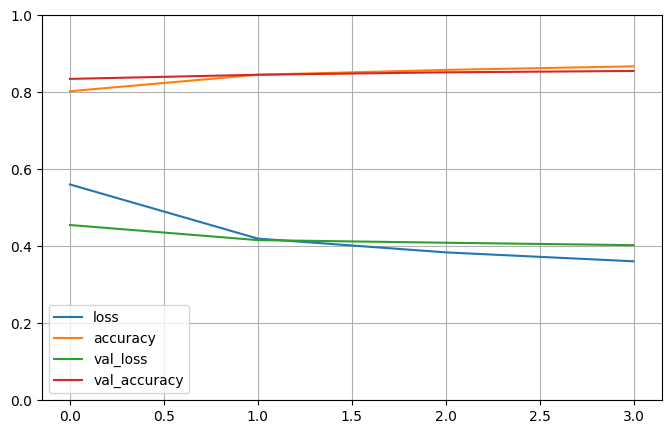

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [22]:
for i, layer in enumerate(model.layers):
    layer._name = 'layer_' + str(i)


conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


modified_model = Sequential([
   conv_base,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="softmax"),
])

In [24]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=2, verbose=1, batch_size=64, validation_split=0.2)

Epoch 1/2
750/750 [==============================] - 649s 865ms/step - loss: 0.3167 - accuracy: 0.8842 - val_loss: 0.3662 - val_accuracy: 0.8659
Epoch 2/2
750/750 [==============================] - 642s 856ms/step - loss: 0.3108 - accuracy: 0.8860 - val_loss: 0.3656 - val_accuracy: 0.8655


In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 108s 344ms/step - loss: 0.3717 - accuracy: 0.8636


[0.3717322051525116, 0.8636000156402588]